In [1]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
# Please fill in your names here
NAME_STUDENT_1 = "Irene Septyo Rini Panuju"
NAME_STUDENT_2 = "Rumjana Romanova"

In [2]:
%matplotlib inline
from preamble import *
import seaborn as sns
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [3]:
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe.describe()
type(X)
type(ballframe)


,Team,League,Year,RA,...,RankPlayoffs,G,OOBP,OSLG
count,1232.00,1232.0,1232.00,1232.00,...,244.00,1232.00,420.00,420.00
mean,15.67,0.5,1988.96,715.08,...,1.72,3.92,0.33,0.42
std,9.72,0.5,14.82,93.08,...,1.10,0.62,0.02,0.03
min,0.00,0.0,1962.00,472.00,...,0.00,0.00,0.29,0.35
25%,7.00,0.0,1976.75,649.75,...,1.00,4.00,0.32,0.40
50%,16.00,0.5,1989.00,709.00,...,2.00,4.00,0.33,0.42
75%,23.00,1.0,2002.00,774.25,...,3.00,4.00,0.34,0.44
max,38.00,1.0,2012.00,1103.00,...,4.00,7.00,0.38,0.50


numpy.ndarray

pandas.core.frame.DataFrame

#### 1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

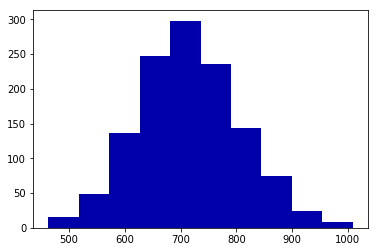

In [6]:
#histogram for target
h = plt.hist(y)

Targets:
RS


Team            float32
League          float32
Year            float32
RA              float32
W               float32
OBP             float32
SLG             float32
BA              float32
Playoffs        float32
RankSeason      float32
RankPlayoffs    float32
G               float32
OOBP            float32
OSLG            float32
dtype: object

Text(0.5,0,'Team')

Text(0.5,0,'League')

Text(0.5,0,'Year')

Text(0.5,0,'RA')

Text(0.5,0,'W')

Text(0.5,0,'OBP')

Text(0.5,0,'SLG')

Text(0.5,0,'BA')

Text(0.5,0,'Playoffs')

Text(0.5,0,'RankSeason')

Text(0.5,0,'RankPlayoffs')

Text(0.5,0,'G')

Text(0.5,0,'OOBP')

Text(0.5,0,'OSLG')

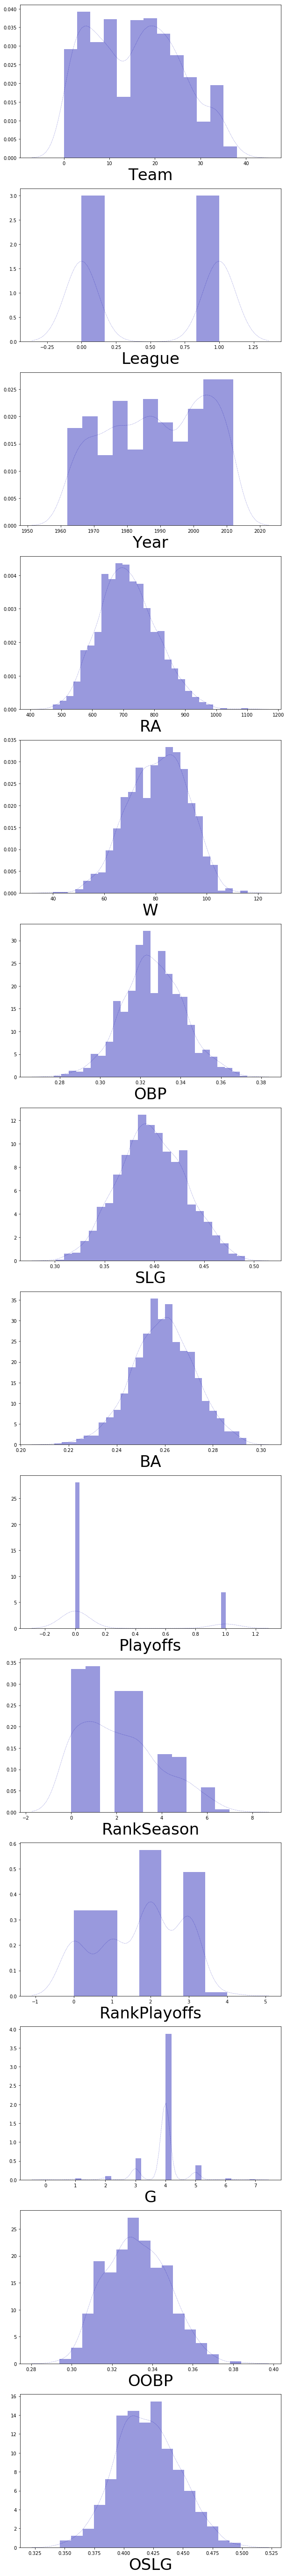

In [7]:
print("Targets:\n{}".format(moneyball.default_target_attribute))

plt.rcParams['figure.figsize'] = (10,100)
fig, axs =plt.subplots(X.shape[1],1)
ballframe.dtypes

for i in range(0, X.shape[1]):
    # check data types 
    # type(X[1][i])

    X_cl = X[:, i][np.logical_not(np.isnan(X[:,i]))]
    # shape to see which ones contain NA values
    #X_cl.shape
    sns.distplot(X_cl,ax = axs[i]).set_xlabel(attribute_names[i],fontsize=34)
fig.show()






RangeIndex(start=0, stop=1232, step=1)

Index(['Team', 'League', 'Year', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs',
       'G'],
      dtype='object')

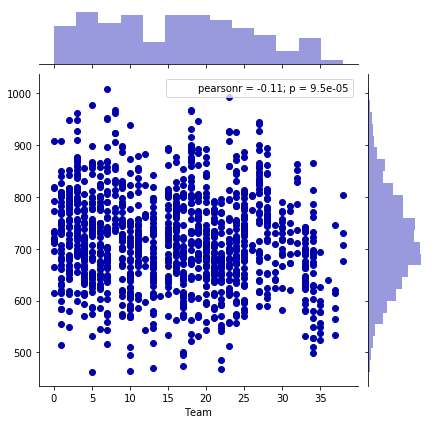

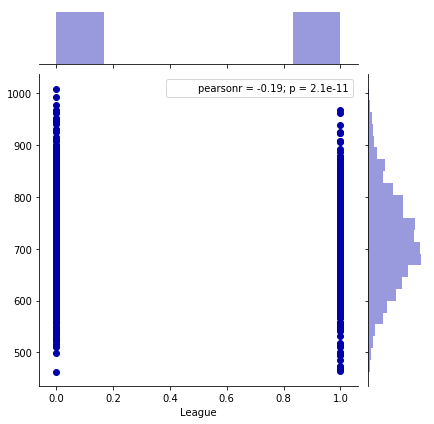

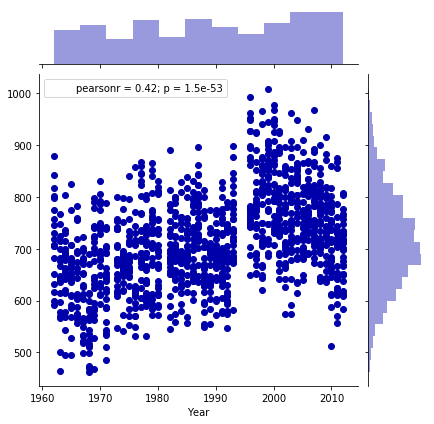

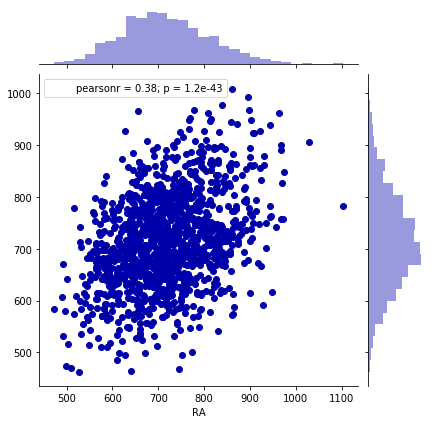

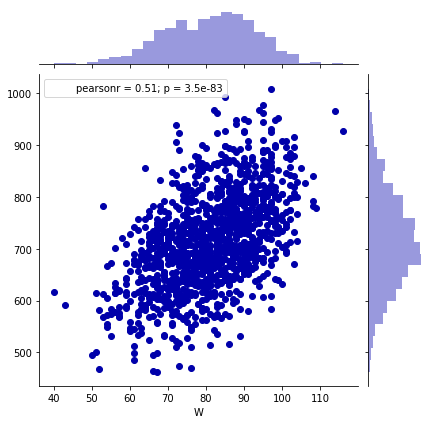

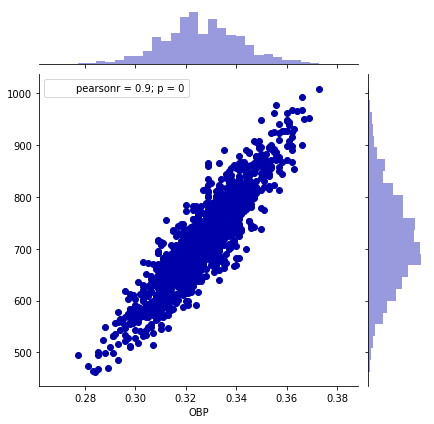

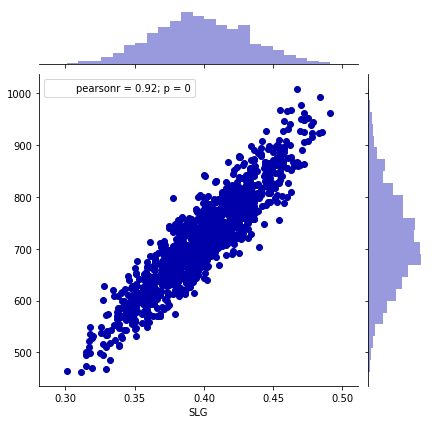

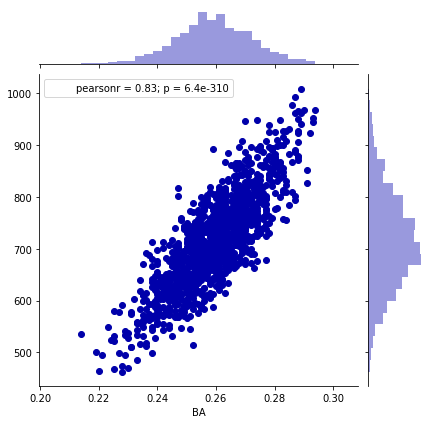

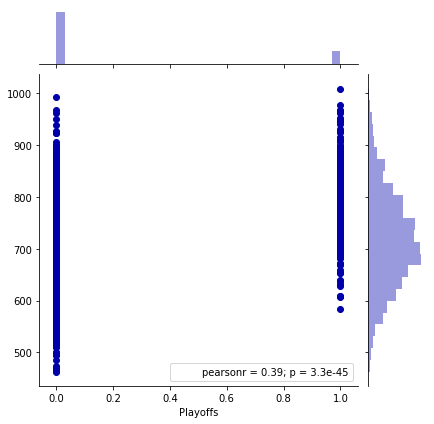

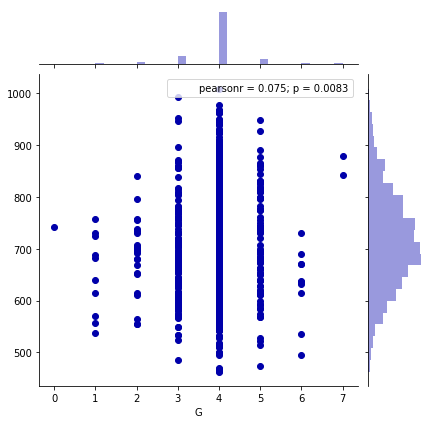

In [6]:
# ballframe_cl = pd.DataFrame(X_cl, columns=attribute_names)
plt.rcParams['figure.figsize'] = (10,10)

ballframe.index

bf_new = ballframe.dropna(axis=1)
bf_new.columns
# scatter matrix from the dataframe, color by class
# sm = pd.scatter_matrix(bf_new, c=y, figsize=(20, 20), cmap=mglearn.cm3)
# sns.pairplot(bf_new, hue=y)
for col in bf_new.columns:
    sns.jointplot(bf_new[col], y)
# seems there is a relation between 


From the scatter plots above, we can see that variables RA, W, OBP, SLG, and BA have some linear correlation with Targets. Therefore, it's probably useful to pay close attention to these variables.

#### 2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

In [9]:
# print("Original features:\n", list(ballframe.columns), "\n")
# moneyball_dummies = pd.get_dummies(ballframe)
# print("Features after get_dummies:\n", list(moneyball_dummies.columns))

In [4]:
# Version 1: encoding categorical data - only the one that is not dropped (wi)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
# default standard scaler 
from sklearn.preprocessing  import StandardScaler

# encoding for categorical data - not sure it does anything - encoding should be already preset from OpenML
X, y, categorical = moneyball.get_data(target=moneyball.default_target_attribute, return_categorical_indicator=True)
print("Categorical features: %s" % categorical)
categorical_new = pd.Series(categorical, index = ballframe.columns)
h = categorical_new.loc[bf_new.columns]

enc = preprocessing.OneHotEncoder(categorical_features=h)
bf_new2 = enc.fit_transform(bf_new)

# with encoder 
X_train2, X_test2, y_train2, y_test2 = train_test_split(bf_new2, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

# without an encoder 
X_train, X_test, y_train, y_test = train_test_split(bf_new, y, random_state=0)
lr2 = LinearRegression().fit(X_train2, y_train2)

# scaler
scaler = StandardScaler(with_mean = False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_sc = LinearRegression().fit(X_train_scaled, y_train)

print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

print("Training set score (R^2) with encoder : {:.2f}".format(lr2.score(X_train2, y_train2)))
print("Test set score (R^2) With encoder: {:.2f}".format(lr2.score(X_test2, y_test2)))



Categorical features: [True, True, False, False, False, False, False, False, True, True, True, True, False, False]


NameError: name 'bf_new' is not defined

In [9]:
# Version 2:

# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

print("Results of Linear Regression")
X_train, X_test, y_train, y_test = train_test_split(bf_new, y, random_state=0)

# normal linear regression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

# lr on scaled data - with Standard Scaler
scaler = StandardScaler(with_mean = False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_sc = LinearRegression().fit(X_train_scaled, y_train)
print("Training set score on scaled data (R^2): {:.2f}".format(lr_sc.score(X_train_scaled, y_train)))
print("Test set score on scaled data (R^2): {:.2f}".format(lr_sc.score(X_test_scaled, y_test)))

# lr with CV
lin_reg = LinearRegression()
scores_lr_cv = cross_val_score(lin_reg, bf_new, y)
print("Cross-validation scores: {}".format(scores_lr_cv))
print("Average Cross-validation scores: {:.2f}".format(scores_lr_cv.mean()))

# lr on scaled data with CV
pipe_lr = Pipeline([("scaler", StandardScaler()), ("linreg", LinearRegression())])
scores_lr_sccv = cross_val_score(pipe_lr, bf_new, y)
print("Cross-validation scores on scaled data: {}".format(scores_lr_sccv))
print("Average cross-validation score on scaled: {:.2f}".format(scores_lr_sccv.mean()))

Results of Linear Regression
Training set score (R^2): 0.95
Test set score (R^2): 0.95
Training set score on scaled data (R^2): 0.95
Test set score on scaled data (R^2): 0.95
Cross-validation scores: [0.92  0.928 0.934]
Average Cross-validation scores: 0.93
Cross-validation scores on scaled data: [0.92  0.928 0.934]
Average cross-validation score on scaled: 0.93


Both non-scaled and scaled data give the same results with LinearRegression (95% training and test score, and 93% average cross-validation score), so we conclude that scaling data does not improve the performance of the model.

In [10]:
from sklearn.linear_model import Ridge

print("Results of Ridge")

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge_sc = Ridge().fit(X_train_scaled, y_train)
print("Training set score on scaled data: {:.2f}".format(ridge_sc.score(X_train_scaled, y_train)))
print("Test set score on scaled data: {:.2f}".format(ridge_sc.score(X_test_scaled, y_test)))

ridge_cv = Ridge()
scores_r_cv = cross_val_score(ridge_cv, bf_new, y)
print("Cross-validation scores: {}".format(scores_r_cv))
print("Average cross-validation score: {:.2f}".format(scores_r_cv.mean()))

# ridge on scaled data with CV
pipe_r = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])
scores_r_sccv = cross_val_score(pipe_r, bf_new, y)
print("Cross-validation scores: {}".format(scores_r_sccv))
print("Average cross-validation score on scaled: {:.2f}".format(scores_r_sccv.mean()))



Results of Ridge
Training set score: 0.88
Test set score: 0.90
Training set score on scaled data: 0.95
Test set score on scaled data: 0.95
Cross-validation scores: [0.833 0.877 0.857]
Average cross-validation score: 0.86
Cross-validation scores: [0.92  0.928 0.934]
Average cross-validation score on scaled: 0.93


Unlike LinearRegression, there seems to be a lot of improvement in Ridge when the data is scaled. After scaling, training and test scores are increased 7% and 5%, respectively. Furthermore, average cross-validation score also sees 9% increase.

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


lasso_sc = Lasso().fit(X_train_scaled, y_train)
print("Training set score on scaled data: {:.2f}".format(lasso_sc.score(X_train_scaled, y_train)))
print("Test set score on scaled data: {:.2f}".format(lasso_sc.score(X_test_scaled, y_test)))


lasso_cv = Lasso()
scores_lasso_cv = cross_val_score(lasso_cv, bf_new, y)
print("Cross-validation scores: {}".format(scores_lasso_cv))
print("Average cross-validation score: {:.2f}".format(scores_lasso_cv.mean()))

# ridge on scaled data with CV
pipe_l = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso())])
scores_l_sccv = cross_val_score(pipe_l, bf_new, y)
print("Cross-validation scores: {}".format(scores_l_sccv))
print("Average cross-validation score on scaled: {:.2f}".format(scores_l_sccv.mean()))


Training set score: 0.85
Test set score: 0.87
Number of features used: 5
Training set score on scaled data: 0.95
Test set score on scaled data: 0.95
Cross-validation scores: [0.804 0.848 0.828]
Average cross-validation score: 0.83
Cross-validation scores: [0.917 0.925 0.939]
Average cross-validation score on scaled: 0.93


Similarly to Ridge, Lasso also performs much better with scaled data. After scaling, training and test set scores are increased for 10% and 8%, while the average cross-validation score is increased for 10%.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

clf_sc = KNeighborsClassifier()
clf_sc.fit(X_train_scaled, y_train)
print("Test set accuracy on scaled data: %.2f" % clf_sc.score(X_test_scaled, y_test))


clf_sc = KNeighborsClassifier()
scores_clf_cv = cross_val_score(clf_sc, bf_new, y)
print("Test set accuracy on cross validation: {}".format(scores_clf_cv))
print("Average cross-validation score: {:.2f}".format(scores_clf_cv.mean()))

# ridge on scaled data with CV
pipe_knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
scores_knn_sccv = cross_val_score(pipe_knn, bf_new, y)
print("Cross-validation scores: {}".format(scores_knn_sccv))
print("Average cross-validation score on scaled: {:.2f}".format(scores_knn_sccv.mean()))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Test set accuracy: 0.00


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Test set accuracy on scaled data: 0.00
Test set accuracy on cross validation: [0.011 0.003 0.   ]
Average cross-validation score: 0.00


c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Cross-validation scores: [0.014 0.01  0.   ]
Average cross-validation score on scaled: 0.01


From the results above, it seems that kNN's performance does not improve with scaled data. Both training and test set accuracy score do not improve after scaling, although cross-validation score is improved for 1%.

In [15]:
from sklearn.linear_model import ElasticNet

en = ElasticNet().fit(X_train, y_train)
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))
# print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


en_sc = ElasticNet().fit(X_train_scaled, y_train)
print("Training set score on scaled data: {:.2f}".format(en_sc.score(X_train_scaled, y_train)))
print("Test set score on scaled data: {:.2f}".format(en_sc.score(X_test_scaled, y_test)))


en_cv = ElasticNet()
scores_en_cv = cross_val_score(en_cv, bf_new, y)
print("Cross-validation scores: {}".format(scores_en_cv))
print("Average cross-validation score: {:.2f}".format(scores_lasso_cv.mean()))

# ridge on scaled data with CV
pipe_en = Pipeline([("scaler", StandardScaler()), ("en", ElasticNet())])
scores_en_sccv = cross_val_score(pipe_en, bf_new, y)
print("Cross-validation scores: {}".format(scores_en_sccv))
print("Average cross-validation score on scaled: {:.2f}".format(scores_en_sccv.mean()))


Training set score: 0.85
Test set score: 0.87
Training set score on scaled data: 0.91
Test set score on scaled data: 0.91
Cross-validation scores: [0.803 0.849 0.828]
Average cross-validation score: 0.83
Cross-validation scores: [0.879 0.885 0.894]
Average cross-validation score on scaled: 0.89


ElasticNet is another method that also performs better with scaled data. Training and test set score are improved by 6% and 4% increase, respectively, after scaling data, and the average cross-validation score is improved by 6%.

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

Text(0.5,1,'Ridge performance')

[Text(0,0.5,'R^2 score'), Text(0.5,0,'Alpha value')]

Text(0.5,1,'Ridge performance')

[Text(0,0.5,'R^2 score'), Text(0.5,0,'Alpha value')]

Text(0.5,1,'Lasso performance')

[Text(0,0.5,'R^2 score'), Text(0.5,0,'Alpha value')]

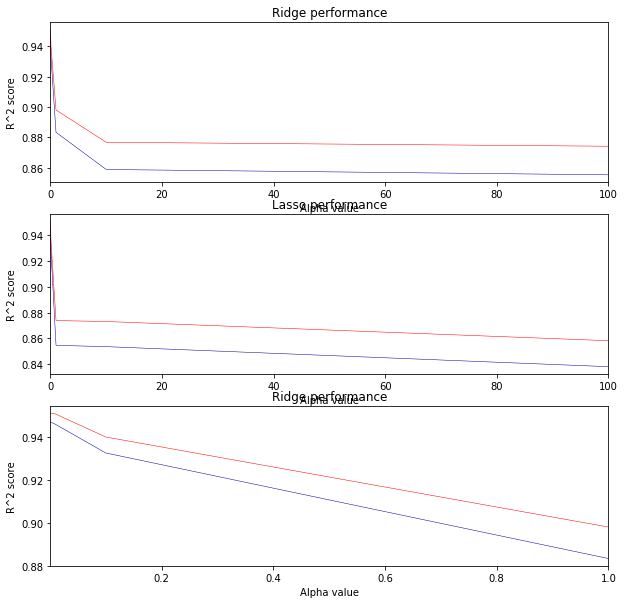

In [16]:
# k-fold or shuffle-split fucntion is meant here
# from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

# KFold(n_splits=3, shuffle=False, random_state=None)
sp = ShuffleSplit(n_splits=10, random_state=0)


figs, axs = plt.subplots(3,1)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge0005 = Ridge(alpha=0.005).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge100 = Ridge(alpha=100).fit(X_train, y_train)

# ridge_train = np.array([[ridge0001.score(X_train, y_train), ridge0005.score(X_train, y_train), 
#                         ridge001.score(X_train, y_train), ridge01.score(X_train, y_train), 
#                         ridge1.score(X_train, y_train, ridge10.score(X_train, y_train),ridge100.score(X_train, y_train)]])
                         
ridge_train = np.array([[ridge0001.score(X_train, y_train), ridge0005.score(X_train, y_train), 
                        ridge001.score(X_train, y_train), ridge01.score(X_train, y_train), 
                        ridge1.score(X_train, y_train), ridge10.score(X_train, y_train),
                        ridge100.score(X_train, y_train)]])
                         
ridge_test = np.array([[ridge0001.score(X_test, y_test), ridge0005.score(X_test, y_test), 
                       ridge001.score(X_test, y_test), ridge01.score(X_test, y_test), ridge1.score(X_test, y_test),
                        ridge10.score(X_test, y_test), ridge100.score(X_test, y_test)]])

test = pd.Series([ridge0001.score(X_test, y_test), ridge0005.score(X_test, y_test), 
                        ridge001.score(X_train, y_train), ridge01.score(X_train, y_train), 
                        ridge1.score(X_train, y_train), ridge10.score(X_train, y_train), ridge100.score(X_train, y_train)], 
                         index=[0.001, 0.005, 0.01, 0.1, 1, 10, 100]) 

# sns.tsplot(ridge_train.set_index('alpha')['score'], ax=axs[0], err_style=None)
ax2 = sns.tsplot(data=ridge_train, time=[0.001, 0.005, 0.01, 0.1, 1, 10, 100],  ax=axs[0], err_style=None)
sns.tsplot(ridge_test,time=[0.001, 0.005, 0.01, 0.1, 1, 10, 100], color = 'r', ax=axs[0], err_style=None).set_title("Ridge performance")
ax2.set(xlabel='Alpha value', ylabel='R^2 score')


ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge0005 = Ridge(alpha=0.005).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)

                     
ridge_train = np.array([[ridge0001.score(X_train, y_train), ridge0005.score(X_train, y_train), 
                        ridge001.score(X_train, y_train), ridge01.score(X_train, y_train), 
                        ridge1.score(X_train, y_train)]])
                         
ridge_test = np.array([[ridge0001.score(X_test, y_test), ridge0005.score(X_test, y_test), 
                       ridge001.score(X_test, y_test), ridge01.score(X_test, y_test), ridge1.score(X_test, y_test)]])

test = pd.Series([ridge0001.score(X_test, y_test), ridge0005.score(X_test, y_test), 
                        ridge001.score(X_train, y_train), ridge01.score(X_train, y_train), 
                        ridge1.score(X_train, y_train)], 
                         index=[0.001, 0.005, 0.01, 0.1, 1]) 

# sns.tsplot(ridge_train.set_index('alpha')['score'], ax=axs[0], err_style=None)
ax3 = sns.tsplot(data=ridge_train, time=[0.001, 0.005, 0.01, 0.1, 1],  ax=axs[2], err_style=None)
sns.tsplot(ridge_test,time=[0.001, 0.005, 0.01, 0.1, 1], color = 'r', ax=axs[2], err_style=None).set_title("Ridge performance")
ax3.set(xlabel='Alpha value', ylabel='R^2 score')



lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
lasso0005 = Lasso(alpha=0.005, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
lasso1 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
lasso100 = Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)

lasso_train = np.array([[lasso0001.score(X_train, y_train), lasso0005.score(X_train, y_train), 
                        lasso001.score(X_train, y_train), lasso01.score(X_train, y_train), 
                        lasso1.score(X_train, y_train), 
                        lasso10.score(X_train, y_train), lasso100.score(X_train, y_train)]])
lasso_test = np.array([[lasso0001.score(X_test, y_test), lasso0005.score(X_test, y_test), 
                       lasso001.score(X_test, y_test), lasso01.score(X_test, y_test), lasso1.score(X_test, y_test), 
                        lasso10.score(X_test, y_test), lasso100.score(X_test, y_test)]])

ax1 = sns.tsplot(data=lasso_train, time=[0.001, 0.005, 0.01, 0.1, 1, 10, 100],  ax=axs[1], err_style=None)
sns.tsplot(lasso_test,time=[0.001, 0.005, 0.01, 0.1, 1, 10, 100], color = 'r', ax=axs[1], err_style=None).set_title("Lasso performance")
ax1.set(xlabel='Alpha value', ylabel='R^2 score')

Parameter grid:
{'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,9.08e-03,5.02e-04,0.88,0.89,...,2.54e-03,3.18e-04,0.02,2.31e-03
1,1.36e-03,3.00e-04,0.88,0.89,...,3.28e-04,2.45e-04,0.02,2.27e-03
2,1.40e-03,3.04e-04,0.88,0.89,...,3.75e-04,2.48e-04,0.02,2.23e-03
3,1.30e-03,2.51e-04,0.89,0.89,...,2.45e-04,2.51e-04,0.02,2.17e-03
4,1.40e-03,5.01e-04,0.89,0.90,...,4.91e-04,3.16e-07,0.02,2.11e-03


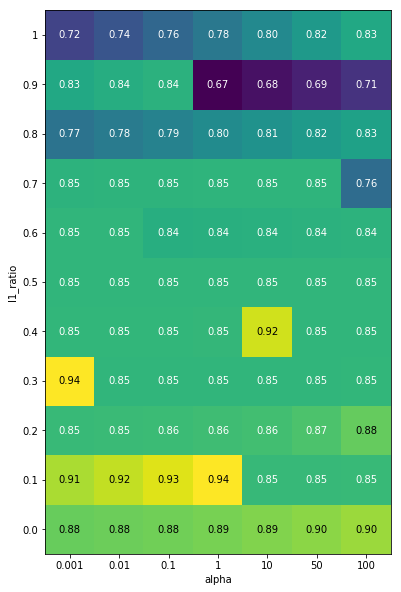

In [17]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100],
              'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
print("Parameter grid:\n{}".format(param_grid))


grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
# Show the first 5 rows
display(results.head())

scores = np.array(results.mean_test_score).reshape(11, 7)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=param_grid['alpha'],
                      ylabel='l1_ratio', yticklabels=param_grid['l1_ratio'], cmap="viridis");

_TODO: add comment here_

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

In [38]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_jobs=-1, random_state=0)
forest.fit(X_train, y_train)
print("Features importances: {}".format(forest.feature_importances_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Features importances: [0.115 0.036 0.128 0.136 0.13  0.125 0.145 0.13  0.015 0.04 ]


,Team,League,Year,RA,...,SLG,BA,Playoffs,G
Ridge a=.001,3.38e-02,-4.66,-0.35,0.27,...,1215.80,-102.10,3.12,4.54
Ridge a=.005,3.23e-02,-4.63,-0.34,0.28,...,1191.60,21.39,3.31,4.39
Ridge a=.01,3.01e-02,-4.62,-0.32,0.30,...,1166.19,126.69,3.48,4.22
Ridge a=.1,-9.40e-03,-5.02,-0.17,0.48,...,894.32,355.95,4.08,2.82
Ridge a=1,-1.09e-01,-6.29,0.16,0.76,...,261.99,105.25,3.92,0.93
Lasso a=.001,3.38e-02,-4.65,-0.35,0.26,...,1213.94,-97.20,3.11,4.56
Lasso a=.005,3.23e-02,-4.61,-0.34,0.27,...,1190.52,-0.00,3.19,4.47
Lasso a=.01,3.00e-02,-4.62,-0.33,0.29,...,1179.11,0.00,3.17,4.35
Lasso a=.1,-8.59e-03,-4.70,-0.18,0.51,...,974.12,0.00,2.81,2.12
Lasso a=1,-1.37e-01,-2.54,0.28,0.87,...,0.00,0.00,0.00,-0.00


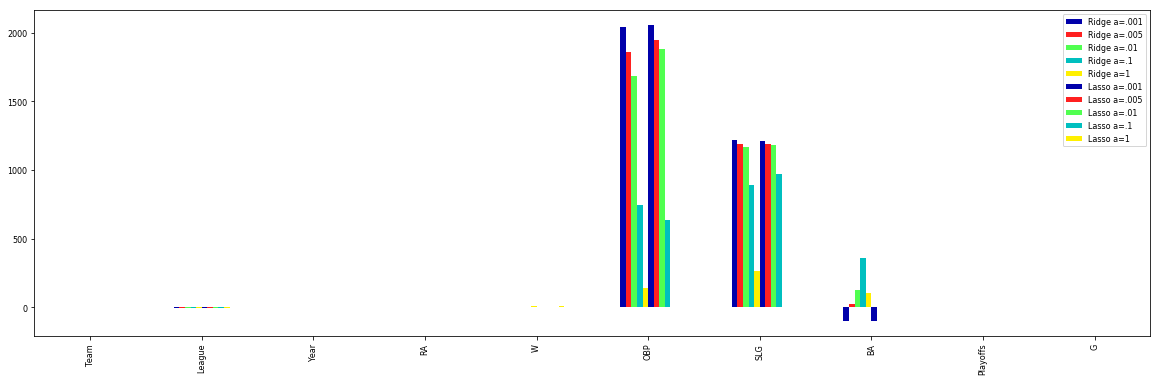

In [57]:
scores = pd.DataFrame(columns=bf_new.columns)
scores.loc["Ridge a=.001"] = ridge0001.coef_
scores.loc["Ridge a=.005"] = ridge0005.coef_
scores.loc["Ridge a=.01"] = ridge001.coef_
scores.loc["Ridge a=.1"] = ridge01.coef_
scores.loc["Ridge a=1"] = ridge1.coef_
scores.loc["Lasso a=.001"] = lasso0001.coef_
scores.loc["Lasso a=.005"] = lasso0005.coef_
scores.loc["Lasso a=.01"] = lasso001.coef_
scores.loc["Lasso a=.1"] = lasso01.coef_
scores.loc["Lasso a=1"] = lasso1.coef_
display(scores)

scores = scores.T
ax = scores.plot(figsize=(20,6), kind='bar')

<Container object of 10 artists>

([<matplotlib.axis.YTick at 0x2e728e87400>,
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'Feature importance')

Text(0,0.5,'Feature')

(-1, 10)

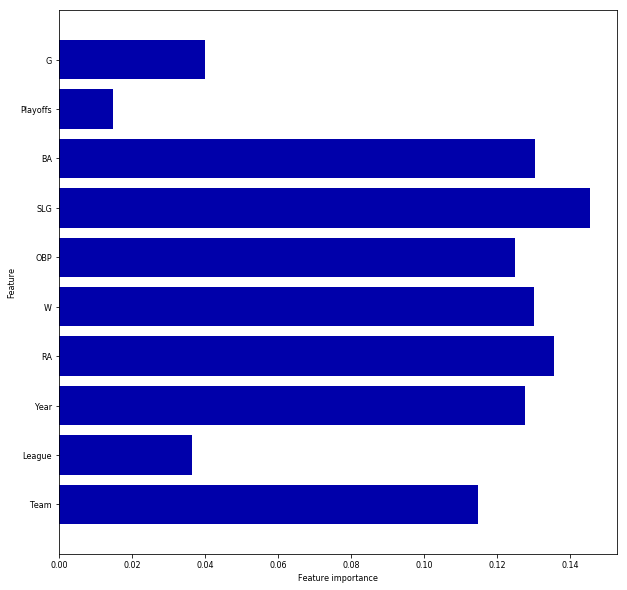

In [58]:
n_features = bf_new.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), bf_new.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

The optimized models seem to mostly agree that either SLG or OBP is the most important feature. Even though there is no clear agreement, we see that models that see OBP as most important also see SLG as the second most important. RandomForest itself sees SLG as the most important, which is aligned with some optimized linear models (Ridge .1, Lasso .1, and Lasso 1).

After examining these results, we conclude that it is important to look for SLG and OBP when scouting for baseball players.

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [5]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
# classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

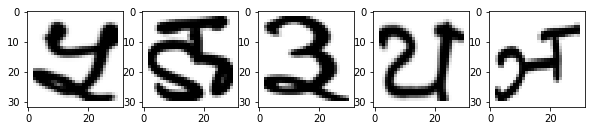

In [7]:
from random import randint

# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
#     axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

In [17]:
test3 = np.array([])
test4 = np.append(3, test4)
test4

array([ 3.,  3.,  3.])

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

# X_train, X_test, y_train, y_test = train_test_split(bf_new, y, random_state=0)
# test + train data should be a subsample of 10%, preserving 75% for training and 25% for testing.
# using stratified shuffle split will result in train size = 0.075 of the initial data set size, and test set = 0.025
strat_shuffle_cv = StratifiedShuffleSplit(n_splits=1, test_size=0.025, train_size=0.075, random_state=0)


for train_index, test_index in strat_shuffle_cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_reg = LogisticRegression().fit(X_train, y_train)
    print("Training set score logistic regression: {:.2f}".format(log_reg.score(X_train, y_train)))
    result_lr = log_reg.score(X_test, y_test)
    print("Test set score Logistic regression: {:.2f}".format(result_lr))
    results_lr = np.append(result_lr, results_lr)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    result_knn = knn.predict(X_test)==y_test
    print("Train set predictions kNN:\n {}".format(np.mean(knn.predict(X_train)==y_train)))
    print("Test set predictions kNN:\n {}".format(np.mean(result_knn)))
    results_knn = np.append(result_knn, results_knn)

    
    forest = RandomForestClassifier(n_jobs=-1, random_state=0)
    forest.fit(X_train, y_train)
    print("Accuracy on training set RF: {:.3f}".format(forest.score(X_train, y_train)))
    print("Accuracy on test set RF: {:.3f}".format(forest.score(X_test, y_test)))

total_running_time = 0
start_time = time.time()

subsample_size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
train_sizes = ([])
test_sizes = ([])

for percent_subs in subsample_size:
    train_sizes = np.append((percent_subs*0.25)/100, train_sizes)
    test_sizes = np.append((percent_subs*0.25)/100, train_sizes)

param_grid = [{'test_size': test_sizes,
               'train_size': train_sizes}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
              
              
for train_index, test_index in strat_shuffle_cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_reg = LogisticRegression().fit(X_train, y_train)
    print("Training set score logistic regression: {:.2f}".format(log_reg.score(X_train, y_train)))
    result_lr = log_reg.score(X_test, y_test)
    print("Test set score Logistic regression: {:.2f}".format(result_lr))
    results_lr = np.append(result_lr, results_lr)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    result_knn = knn.predict(X_test)==y_test
    print("Train set predictions kNN:\n {}".format(np.mean(knn.predict(X_train)==y_train)))
    print("Test set predictions kNN:\n {}".format(np.mean(result_knn)))
    results_knn = np.append(result_knn, results_knn)

    
    forest = RandomForestClassifier(n_jobs=-1, random_state=0)
    forest.fit(X_train, y_train)
    print("Accuracy on training set RF: {:.3f}".format(forest.score(X_train, y_train)))
    print("Accuracy on test set RF: {:.3f}".format(forest.score(X_test, y_test)))


(92000, 1024)

(92000,)

Training set score logistic regression: 1.00
Test set score Logistic regression: 0.48


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Train set predictions kNN:
 0.85
Test set predictions kNN:
 0.7573913043478261


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Accuracy on training set RF: 0.998
Accuracy on test set RF: 0.557
Test set predictions log reg:
 0.4791304347826087
Test set predictions kNN Average:
 0.7573913043478261


2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [3]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

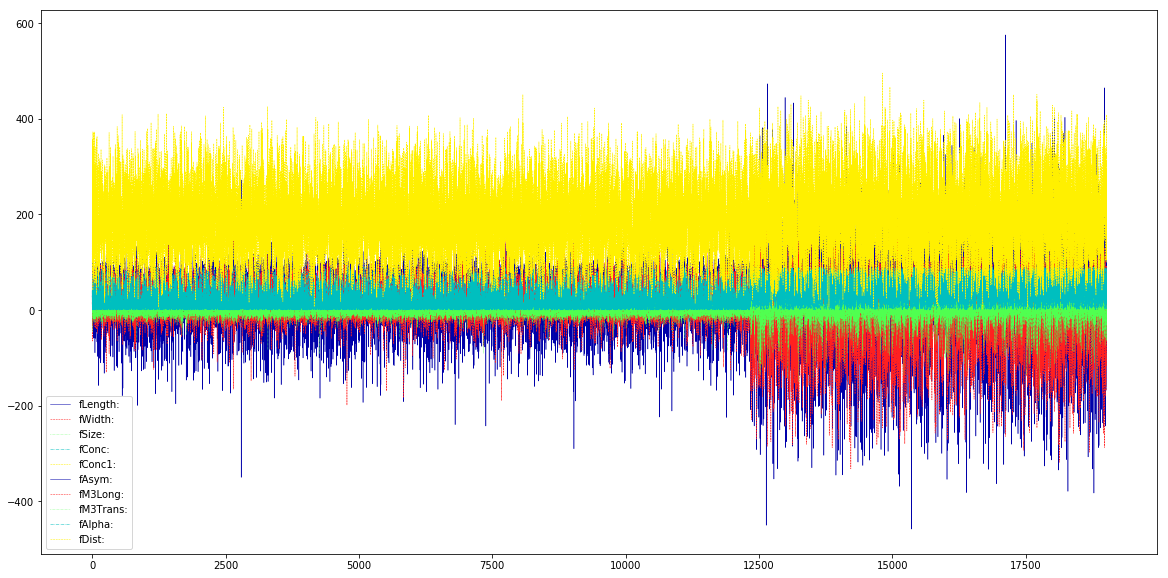

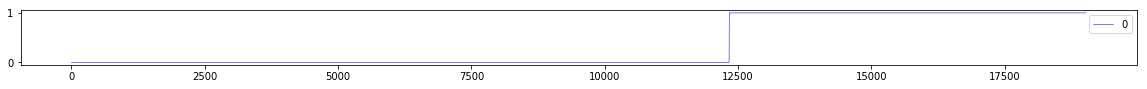

In [4]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

[   1    2    4    8   16   32   64  128  256  512 1024]


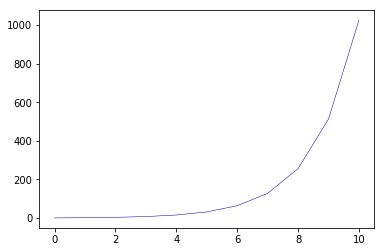

In [5]:
estimates = np.logspace(0,10,num=11,base=2.0,endpoint=True,dtype='int')
print(estimates)
plt.plot(estimates)

Analyzing RandomForestClassifier with n_estimators: 1
Bias squared: 577.27, Variance: 670.36, Total error: 1247.63
Analyzing RandomForestClassifier with n_estimators: 2
Bias squared: 686.32, Variance: 426.32, Total error: 1112.64
Analyzing RandomForestClassifier with n_estimators: 4
Bias squared: 618.57, Variance: 330.14, Total error: 948.71
Analyzing RandomForestClassifier with n_estimators: 8
Bias squared: 608.79, Variance: 247.19, Total error: 855.98
Analyzing RandomForestClassifier with n_estimators: 16
Bias squared: 619.26, Variance: 188.41, Total error: 807.67
Analyzing RandomForestClassifier with n_estimators: 32
Bias squared: 632.17, Variance: 146.47, Total error: 778.64
Analyzing RandomForestClassifier with n_estimators: 64
Bias squared: 648.64, Variance: 118.89, Total error: 767.53
Analyzing RandomForestClassifier with n_estimators: 128
Bias squared: 662.88, Variance: 101.88, Total error: 764.76
Analyzing RandomForestClassifier with n_estimators: 256
Bias squared: 663.48, Var

,Estimates,Bias squared,Variance,Total error
RandomForestClassifier: 1 trees,1.0,577.27,670.36,1247.63
RandomForestClassifier: 2 trees,2.0,686.32,426.32,1112.64
RandomForestClassifier: 4 trees,4.0,618.57,330.14,948.71
RandomForestClassifier: 8 trees,8.0,608.79,247.19,855.98
RandomForestClassifier: 16 trees,16.0,619.26,188.41,807.67
RandomForestClassifier: 32 trees,32.0,632.17,146.47,778.64
RandomForestClassifier: 64 trees,64.0,648.64,118.89,767.53
RandomForestClassifier: 128 trees,128.0,662.88,101.88,764.76
RandomForestClassifier: 256 trees,256.0,663.48,92.26,755.74
RandomForestClassifier: 512 trees,512.0,670.23,86.63,756.86


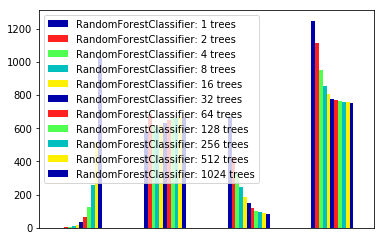

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier 

scores = pd.DataFrame(columns=['Estimates', 'Bias squared', 'Variance', 'Total error'])
        
def calc_print_bias_variance(y_all_pred, model_name, e):
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
               for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    print("Bias squared: %.2f, Variance: %.2f, Total error: %.2f" % (bias_sq, var, error))
    scores.loc[model_name] = [e, bias_sq, var, error]

for estimate in estimates:
    print("Analyzing RandomForestClassifier with n_estimators: " + str(estimate))
    
    forest = RandomForestClassifier(n_estimators = estimate, random_state=2, n_jobs = -1)

    # Store sample predictions
    forest_all_pred = [[] for _ in range(len(y))]

    # Bootstraps
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # RandomForest
        forest.fit(X_train, y_train)
        y_forest_pred = forest.predict(X_test)

        # Store predictions
        for i,index in enumerate(test_index):
            forest_all_pred[index].append(y_forest_pred[i])
            
    pd.to_pickle(forest_all_pred, 'RF_Predictions_' + str(estimate) + '.pkl')

    calc_print_bias_variance(forest_all_pred, 'RandomForestClassifier: ' + str(estimate) + ' trees', estimate)

# Showing the results
display(scores)
scores = scores.T
ax = scores.plot(kind='bar')
ax.set_xticks([])
plt.legend(loc='best');

Bias squared: 577.27, Variance: 670.36, Total error: 1247.63
Bias squared: 686.32, Variance: 426.32, Total error: 1112.64
Bias squared: 618.57, Variance: 330.14, Total error: 948.71
Bias squared: 608.79, Variance: 247.19, Total error: 855.98
Bias squared: 619.26, Variance: 188.41, Total error: 807.67
Bias squared: 632.17, Variance: 146.47, Total error: 778.64
Bias squared: 648.64, Variance: 118.89, Total error: 767.53
Bias squared: 662.88, Variance: 101.88, Total error: 764.76
Bias squared: 663.48, Variance: 92.26, Total error: 755.74
Bias squared: 670.23, Variance: 86.63, Total error: 756.86
Bias squared: 668.71, Variance: 85.07, Total error: 753.78


,Estimates,Bias squared,Variance,Total error
1 trees,1.0,577.27,670.36,1247.63
2 trees,2.0,686.32,426.32,1112.64
4 trees,4.0,618.57,330.14,948.71
8 trees,8.0,608.79,247.19,855.98
16 trees,16.0,619.26,188.41,807.67
32 trees,32.0,632.17,146.47,778.64
64 trees,64.0,648.64,118.89,767.53
128 trees,128.0,662.88,101.88,764.76
256 trees,256.0,663.48,92.26,755.74
512 trees,512.0,670.23,86.63,756.86


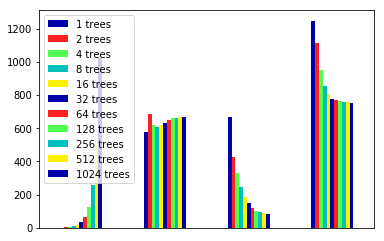

In [12]:
# Better graphs for RandomForest
scores = pd.DataFrame(columns=['Estimates', 'Bias squared', 'Variance', 'Total error'])

for estimate in estimates:
    forest_all_pred = pd.read_pickle('RF_Predictions_' + str(estimate) + '.pkl')
    calc_print_bias_variance(forest_all_pred, str(estimate) + ' trees', estimate)
    
# Showing the results
display(scores)
scores = scores.T
ax = scores.plot(kind='bar')
ax.set_xticks([])
plt.legend(loc='best');

Analyzing GradientBoostingClassifier with n_estimators: 1
Bias squared: 2206.53, Variance: 0.00, Total error: 2206.53
Analyzing GradientBoostingClassifier with n_estimators: 2
Bias squared: 2207.24, Variance: 0.00, Total error: 2207.24
Analyzing GradientBoostingClassifier with n_estimators: 4
Bias squared: 1341.99, Variance: 65.40, Total error: 1407.39
Analyzing GradientBoostingClassifier with n_estimators: 8
Bias squared: 1193.09, Variance: 58.56, Total error: 1251.65
Analyzing GradientBoostingClassifier with n_estimators: 16
Bias squared: 969.37, Variance: 75.10, Total error: 1044.47
Analyzing GradientBoostingClassifier with n_estimators: 32
Bias squared: 851.61, Variance: 73.20, Total error: 924.81
Analyzing GradientBoostingClassifier with n_estimators: 64
Bias squared: 770.84, Variance: 70.41, Total error: 841.25
Analyzing GradientBoostingClassifier with n_estimators: 128
Bias squared: 717.04, Variance: 78.77, Total error: 795.81
Analyzing GradientBoostingClassifier with n_estimato

,Estimates,Bias squared,Variance,Total error
1 trees,1.0,2206.53,0.00,2206.53
2 trees,2.0,2207.24,0.00,2207.24
4 trees,4.0,1341.99,65.40,1407.39
8 trees,8.0,1193.09,58.56,1251.65
16 trees,16.0,969.37,75.10,1044.47
32 trees,32.0,851.61,73.20,924.81
64 trees,64.0,770.84,70.41,841.25
128 trees,128.0,717.04,78.77,795.81
256 trees,256.0,673.39,93.65,767.04
512 trees,512.0,636.93,113.22,750.15


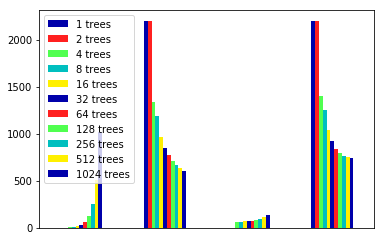

In [7]:
from sklearn.ensemble import GradientBoostingClassifier 

scores = pd.DataFrame(columns=['Estimates', 'Bias squared', 'Variance', 'Total error'])

for estimate in estimates:
    print("Analyzing GradientBoostingClassifier with n_estimators: " + str(estimate))
    
    gradient = GradientBoostingClassifier(n_estimators = estimate, random_state=2)

    # Store sample predictions
    gradient_all_pred = [[] for _ in range(len(y))]

    # Bootstraps
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # RandomForest
        gradient.fit(X_train, y_train)
        y_gradient_pred = gradient.predict(X_test)

        # Store predictions
        for i,index in enumerate(test_index):
            gradient_all_pred[index].append(y_gradient_pred[i])
            
    pd.to_pickle(gradient_all_pred, 'GB_Predictions_' + str(estimate) + '.pkl')

    calc_print_bias_variance(gradient_all_pred, str(estimate) + ' trees', estimate)

# Showing the results
display(scores)
scores = scores.T
ax = scores.plot(kind='bar')
ax.set_xticks([])
plt.legend(loc='best');

The first thing that we noticed from the graphs above is that RandomForest's bias squared is increased the more trees are used, but GradientBoosting's bias squared is actually reduced the more trees are used. This means that the more trees are used in RandomForest, the more likely it is to underfit. However, the more trees are used in GradientBoosting, the less likely it is to underfit.

Variance is also reduced for RandomForest models with more trees, while the opposite is true for GradientBoosting: the more trees are used, the more variances there are. This means that the more trees are used in RandomForest, the more likely it is to overfit. In the mean time, the more trees are used in GradientBoosting, the less likely it is to overfit.

On another hand, RandomForest's total error is reduced the more trees are used. The same also happens with GradientBoosting. This means that the more trees are used, the more accurate the results of these models are.

In general, it seems that RandomForest performs the best with small ensemble, while GradientBoosting performs better with more ensembles. This is not unexpected considering the way RandomForest works: the more trees it creates, the better the algorithm can locate and classify outliers. This gives more accurate results, but at the same time it also results in more chance of overfitting, which was proven by our bias-variance-error experiment.

On the other hand, GradientBoosting works by increasing the weights of the badly predicted points with each iteration. Thus, the more trees are used, the more iterations there are, and the more accurate the results will be. Furthermore, because the wrong predictions from the previous iterations were flagged, the less likely it will overfit, making the results better in general. This was also proven in our bias-variance-error experiment.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

In [36]:
from sklearn.metrics import roc_auc_score

# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

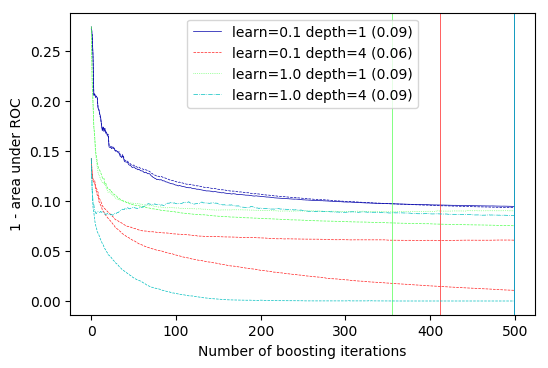

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

gradient_01_1 = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.1, max_depth=1)    
gradient_01_4 = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.1, max_depth=4)
gradient_1_1 = GradientBoostingClassifier(n_estimators = 500, learning_rate=1, max_depth=1)
gradient_1_4 = GradientBoostingClassifier(n_estimators = 500, learning_rate=1, max_depth=4)
    
gradient_01_1.fit(X_train, y_train)
pd.to_pickle(gradient_01_1, 'gradient_01_4' + str(iteration) + '.pkl')
  
gradient_01_4.fit(X_train, y_train)
pd.to_pickle(gradient_01_4, 'gradient_01_4' + str(iteration) + '.pkl')
   
gradient_1_1.fit(X_train, y_train)
pd.to_pickle(gradient_1_1, 'gradient_1_1' + str(iteration) + '.pkl')
    
gradient_1_4.fit(X_train, y_train)
pd.to_pickle(gradient_1_4, 'gradient_1_4' + str(iteration) + '.pkl')

plt.rcParams['figure.dpi'] = 100
validation_curve([gradient_01_1, gradient_01_4, gradient_1_1, gradient_1_4], X_test, y_test, X_train, y_train)

From the validation curves above, we can immediately see that there are a couple of configurations where the AUROC scores of the test and training data are widely different, namely the classifiers with tree depth 4 (red and light blue). Because there is such significant difference in the test and training scores for the models with tree depth 4, we suspect that these models are under- or overfitting.

Aside from the depth, the learning rate also seems to give influence to under- or overfit as well. If we look at the classifiers with tree depth 1 (dark blue and green), it seems that the model with learning rate 1 (green) under- or overfits more than the model with learning rate 0.1 (dark blue). This is understandable because the higher the learning rate, the quicker GradientBoosting learns about the data and the more likely it fits (and then overfits) the data. By slowing the learning of GradientBoosting classifier, we prevent the model from overfitting.

Even though more tree depths seems to result in more under- or overfitting, we can also see that the scores of models with tree depth 4 (red and light blue) are better compared to the models with less depth, signifying better accuracy. This makes sense as having more trees allows a classifier to locate and classify more points in the data.

Thus, it would seem that combining low learning rate with high tree depth (red curve) seems to be the most optimal choice, since it offers more accuracy and at the same time lowers the chance of under- or overfitting.